### 1. Umieszczenie danych w Digital Ocean Spaces


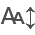

In [24]:
# wizualizacja DataFrame

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [25]:
# praca z Cloud Storage

from dotenv import load_dotenv
import boto3
import os

load_dotenv()

s3 = boto3.client(
    "s3",
    #aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    #aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    #endpoint_url=os.getenv("AWS_ENDPOINT_URL_S3")
)

In [26]:
BUCKET_NAME = "halfmarathonn"

In [27]:
# wysyłanie plików do Cloud Storage

s3.upload_file(
    Filename='halfmarathon_wroclaw_2023__final.csv',
    Bucket=BUCKET_NAME,
    Key='stocks/year=2023/halfmarathon_wroclaw_2023__final.csv'
)

s3.upload_file(
    Filename='halfmarathon_wroclaw_2024__final.csv',
    Bucket=BUCKET_NAME,
    Key='stocks/year=2024/halfmarathon_wroclaw_2024__final.csv'
)

### 2.1. Wczytanie danych z Digital Ocean Spaces do DataFrame

In [29]:
import pandas as pd

df = pd.read_csv('halfmarathon_wroclaw_2023__final.csv', sep=';')
df.head()

Miejsce  Numer startowy       Imię       Nazwisko   Miasto Kraj  \
0      1.0            1787     TOMASZ         GRYCKO      NaN  POL   
1      2.0               3  ARKADIUSZ  GARDZIELEWSKI  WROCŁAW  POL   
2      3.0            3832  KRZYSZTOF          HADAS   POZNAŃ  POL   
3      4.0             416     DAMIAN         DYDUCH    KĘPNO  POL   
4      5.0            8476      KAMIL      MAŃKOWSKI   MIRKÓW  POL   

                     Drużyna Płeć  Płeć Miejsce Kategoria wiekowa  ...  \
0     UKS BLIZA WŁADYSŁAWOWO    M           1.0               M30  ...   
1  ARKADIUSZGARDZIELEWSKI.PL    M           2.0               M30  ...   
2                        NaN    M           3.0               M20  ...   
3   AZS POLITECHNIKA OPOLSKA    M           4.0               M30  ...   
4            PARKRUN WROCŁAW    M           5.0               M20  ...   

   10 km Tempo  15 km Czas 15 km Miejsce Open  15 km Tempo  20 km Czas  \
0     2.926667    00:44:47                1.0     3.106667    01:01:43   
1     2.983333    00:45:26                2.0     3.143333    01:03:08   
2     3.123333    00:47:34                3.0     3.236667    01:05:09   
3     3.196667    00:48:49                5.0     3.330000    01:06:54   
4     3.276667    00:49:31                7.0     3.386667    01:07:27   

  20 km Miejsce Open  20 km Tempo  Tempo Stabilność      Czas     Tempo  
0                1.0     3.386667          0.031400  01:04:59  3.080509  
1                2.0     3.540000          0.038000  01:06:23  3.146875  
2                3.0     3.516667          0.024067  01:08:24  3.242475  
3                4.0     3.616667          0.025467  01:10:16  3.330963  
4                5.0     3.586667          0.023000  01:10:27  3.339654  

[5 rows x 27 columns]

### 2.2. Czyszczenie danych

In [30]:
# Snippet pomocniczy - zmiana czasu na sekundy

def convert_time_to_seconds(time):
    if pd.isnull(time) or time in ['DNS', 'DNF']: #DID NOT START / DID NOT FINISH
        return None
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

In [31]:
df['Czas'] = df['Czas'].apply(convert_time_to_seconds)
df['5 km Czas'] = df['5 km Czas'].apply(convert_time_to_seconds)
df['10 km Czas'] = df['10 km Czas'].apply(convert_time_to_seconds)
df['15 km Czas'] = df['15 km Czas'].apply(convert_time_to_seconds)
df['20 km Czas'] = df['20 km Czas'].apply(convert_time_to_seconds)

In [32]:
# zostawiam tylko potrzebne kolumny

df = df[['Płeć', 'Rocznik', '5 km Czas', '5 km Tempo', '10 km Czas', '10 km Tempo',
        '15 km Czas', '15 km Tempo', '20 km Czas', '20 km Tempo', 'Czas', 'Tempo']].copy()

In [33]:
# zmieniam nazewnictwo

df = df.rename(columns = {
    '5 km Czas' : '5km Czas [sek]', 
    '10 km Czas' : '10km Czas [sek]', 
    '15 km Czas' : '15km Czas [sek]', 
    '20 km Czas' : '20km Czas [sek]',
    '5 km Tempo' : '5km Tempo [min/km]',
    '10 km Tempo' : '10km Tempo [min/km]',
    '15 km Tempo' : '15km Tempo [min/km]',
    '20 km Tempo' : '20km Tempo [min/km]',
    'Tempo' : 'Tempo [min/km]',
    'Czas' : 'Czas [sek]'})

In [34]:
# zmieniam kolumne rocznik na kolumne wiek

df['Wiek'] = 2024 - df['Rocznik']
df = df.drop(columns=['Rocznik'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Płeć                 8948 non-null   object 
 1   5km Czas [sek]       8123 non-null   float64
 2   5km Tempo [min/km]   8123 non-null   float64
 3   10km Czas [sek]      8139 non-null   float64
 4   10km Tempo [min/km]  8116 non-null   float64
 5   15km Czas [sek]      8141 non-null   float64
 6   15km Tempo [min/km]  8136 non-null   float64
 7   20km Czas [sek]      8144 non-null   float64
 8   20km Tempo [min/km]  8137 non-null   float64
 9   Czas [sek]           8150 non-null   float64
 10  Tempo [min/km]       8150 non-null   float64
 11  Wiek                 8749 non-null   float64
dtypes: float64(11), object(1)
memory usage: 839.2+ KB


In [36]:
# sprawdzam wartości brakujace w ujęciu procentowym

df.isnull().sum() / len(df)

Płeć                   0.000223
5km Czas [sek]         0.092402
5km Tempo [min/km]     0.092402
10km Czas [sek]        0.090615
10km Tempo [min/km]    0.093184
15km Czas [sek]        0.090391
15km Tempo [min/km]    0.090950
20km Czas [sek]        0.090056
20km Tempo [min/km]    0.090838
Czas [sek]             0.089385
Tempo [min/km]         0.089385
Wiek                   0.022458
dtype: float64

In [37]:
len(df.dropna(subset=['Wiek', 'Płeć', 'Czas [sek]'])) / len(df) * 100

88.81564245810057

In [38]:
# widzę, że brakuje wszystkich pomiarów

df[df['Czas [sek]'].isna()].sample(5)

Płeć  5km Czas [sek]  5km Tempo [min/km]  10km Czas [sek]  \
8689    M             NaN                 NaN              NaN   
8650    M             NaN                 NaN              NaN   
8300    M             NaN                 NaN              NaN   
8764    K             NaN                 NaN              NaN   
8861    M             NaN                 NaN              NaN   

      10km Tempo [min/km]  15km Czas [sek]  15km Tempo [min/km]  \
8689                  NaN              NaN                  NaN   
8650                  NaN              NaN                  NaN   
8300                  NaN              NaN                  NaN   
8764                  NaN              NaN                  NaN   
8861                  NaN              NaN                  NaN   

      20km Czas [sek]  20km Tempo [min/km]  Czas [sek]  Tempo [min/km]  Wiek  
8689              NaN                  NaN         NaN             NaN  50.0  
8650              NaN                  NaN         NaN             NaN  25.0  
8300              NaN                  NaN         NaN             NaN  50.0  
8764              NaN                  NaN         NaN             NaN  31.0  
8861              NaN                  NaN         NaN             NaN  40.0

In [39]:
# usuwam NaN z kolumn wiek, płeć bowiem to tylko nieco ponad 2% danych, ktore nie maja takiego wplywu
# dodatkowo usuwam ponad 20% danych z kolumny Czas, bowiem Ci zawodnicy nie zostali zmierzeni

df.dropna(subset=['Wiek', 'Płeć', 'Czas [sek]'], inplace=True)

In [40]:
df.isna().sum()

# najwazniejsze, ze nie ma NaN w kolumnie target= 'Czas [sek]'
# z reszta poradzi sobie PyCaret

Płeć                    0
5km Czas [sek]         26
5km Tempo [min/km]     26
10km Czas [sek]        10
10km Tempo [min/km]    33
15km Czas [sek]         8
15km Tempo [min/km]    13
20km Czas [sek]         5
20km Tempo [min/km]    12
Czas [sek]              0
Tempo [min/km]          0
Wiek                    0
dtype: int64

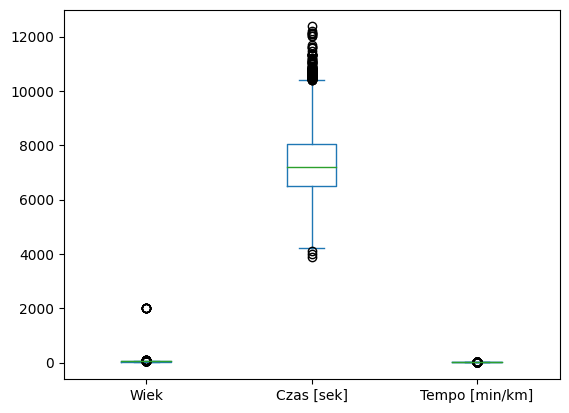

In [41]:
#sprawdzam przykładowe wartości odstajace

df[['Wiek', 'Czas [sek]', 'Tempo [min/km]']].plot(kind='box');

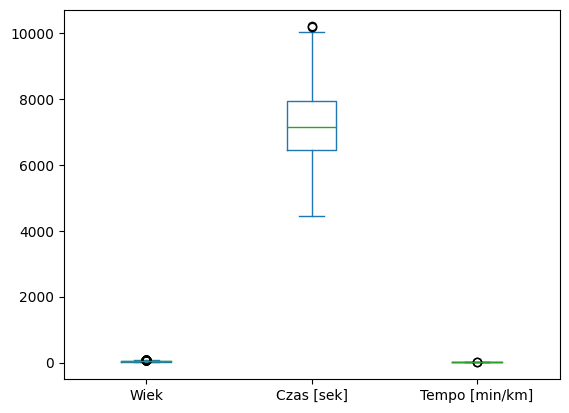

In [42]:
#usuwam wszystkie wartości odstajace z kolumn 'Czas', 'Tempo' oraz 'Wiek'

columns_with_outliers = [
    'Wiek', 'Tempo [min/km]', '5km Czas [sek]', '10km Czas [sek]', '15km Czas [sek]', '20km Czas [sek]', 'Czas [sek]',
    '5km Tempo [min/km]', '10km Tempo [min/km]', '15km Tempo [min/km]', '20km Tempo [min/km]'
]

clear_df = df.copy()

for column in columns_with_outliers:
    Q1 = clear_df[column].quantile(0.25)
    Q3 = clear_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    clear_df = clear_df[~((clear_df[column] < lower_bound) | (clear_df[column] > upper_bound))]

clear_df[['Wiek', 'Czas [sek]', 'Tempo [min/km]']].plot(kind='box');

### 2.3. Trenowanie modelu

In [43]:
# importuję biblioteki dla modelu regresji (model -> value)

from pycaret.regression import setup, compare_models, finalize_model, plot_model, save_model, predict_model

In [44]:
# tworzę eksperyment
# po kilku próbach odtworzeń eksperymentu zdecydowałem zignorować kolumny z tempem, gdyż jest to wynikowa czasu
# dodatkowo pozostawiłem jedynie czas na 5 i 10km, gdyż sa to typowe dystansy startowe (pomimo duzo wiekszego MAE!)
# + dodałem w v2: tempo na 15km żeby zmniejszyć MAE

exp = setup(
    data=clear_df, 
    target='Czas [sek]',
    ignore_features=['Tempo [min/km]', '5km Tempo [min/km]', '10km Tempo [min/km]', 
                     '20km Tempo [min/km]','15km Czas [sek]', '20km Czas [sek]'],
    session_id=123)

Description,Value
Session id,123
Target,Czas [sek]
Target type,Regression
Original data shape,"(7544, 12)"
Transformed data shape,"(7544, 6)"
Transformed train set shape,"(5280, 6)"
Transformed test set shape,"(2264, 6)"
Ignore features,6
Numeric features,4
Categorical features,1


In [45]:
# szukam najlepszego modelu pod katem metryki MAE - średni bład bezw.

best_model = exp.compare_models(sort='MAE')

In [46]:
# próba strojenia hiperparametrów

best_tuned_model = exp.tune_model(best_model, n_iter=200, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,84.3927,14718.7086,121.3207,0.9866,0.0161,0.0114
1,84.1175,16108.4563,126.9191,0.9863,0.0167,0.0114
2,84.0958,16546.9142,128.6348,0.9839,0.0169,0.0113
3,80.3377,14742.6875,121.4195,0.9870,0.0162,0.0110
4,83.1082,19674.8857,140.2672,0.9821,0.0187,0.0114
5,86.8624,17906.4561,133.8150,0.9851,0.0180,0.0118
6,76.4696,10780.4295,103.8288,0.9903,0.0140,0.0104
7,86.6599,20581.2501,143.4617,0.9835,0.0185,0.0116
8,79.8713,12888.1817,113.5261,0.9888,0.0147,0.0108


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
# strojenie hiperparametrow nie przynioslo rezultatow

best_final_model = compare_models([best_model, best_tuned_model])

Initiated  . . . . . . . . . . . . . . . . . .              15:59:27
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,83.4718,17947.2441,132.1672,0.9841,0.0174,0.0113,0.0300
1,Linear Regression,83.4718,17947.2441,132.1672,0.9841,0.0174,0.0113,0.0180


In [48]:
# sprawdzam best model na Holdout Dataset - jeszcze lepsza skuteczność!

exp.predict_model(best_final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,82.0679,14484.0280,120.3496,0.9876,0.0160,0.0111


Płeć  5km Czas [sek]  10km Czas [sek]  15km Tempo [min/km]  Wiek  \
7482    M          1872.0           3839.0             7.013333  40.0   
6672    K          1854.0           3773.0             6.770000  42.0   
7380    M          1855.0           3741.0             6.906667  51.0   
3941    M          1769.0           3452.0             5.466667  28.0   
3645    M          1634.0           3243.0             5.716667  53.0   
...   ...             ...              ...                  ...   ...   
728     K          1325.0           2651.0             4.686666  34.0   
5122    M          1781.0           3545.0             6.146667  37.0   
5662    M          1787.0           3581.0             6.230000  32.0   
7032    M          2014.0           3899.0             6.913333  29.0   
3812    K          1682.0           3305.0             5.570000  46.0   

      Czas [sek]  prediction_label  
7482      9189.0       8740.867833  
6672      8463.0       8465.487686  
7380      9082.0       8574.821209  
3941      7162.0       7165.313349  
3645      7074.0       7204.149860  
...          ...               ...  
728       5867.0       5861.487014  
5122      7597.0       7795.646529  
5662      7841.0       7892.278247  
7032      8745.0       8700.269005  
3812      7129.0       7109.499933  

[2264 rows x 7 columns]

#### Wizualizacje

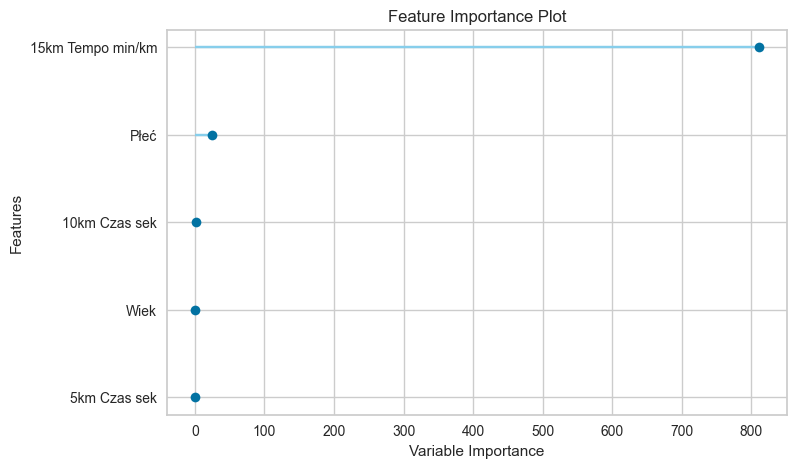

In [49]:
# istotność cech

plot_model(best_final_model, plot='feature')

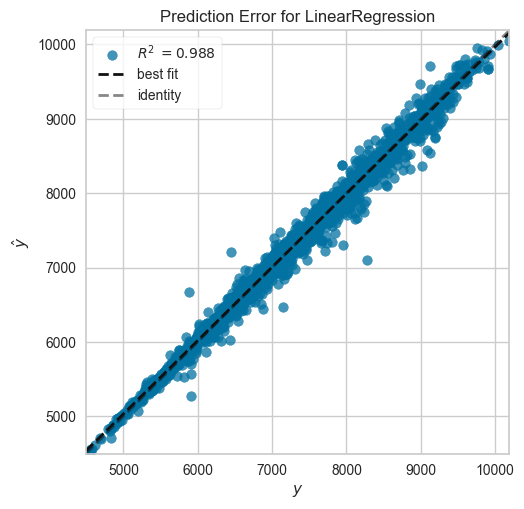

In [50]:
# widać, że model przewiduje niemalże doskonale

plot_model(best_final_model, plot='error')

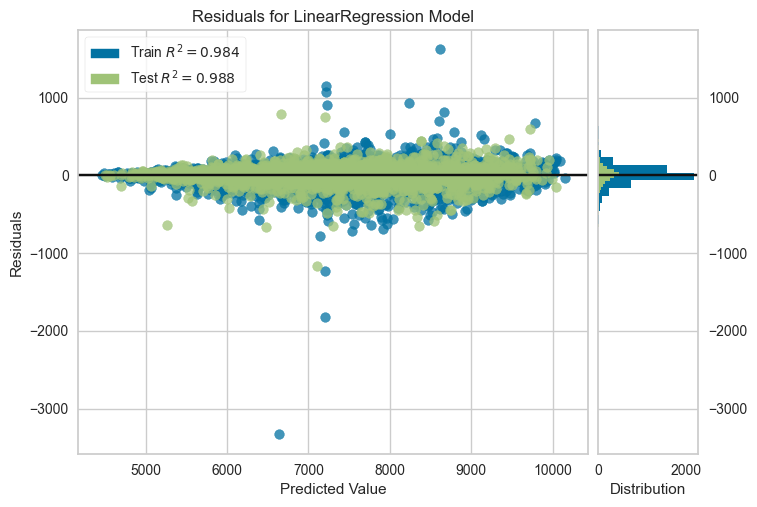

In [51]:
# widać, że model nie jest przeuczony - bardzo dobrze przewiduje dla danych testowych jak i treningowych

plot_model(best_final_model, plot='residuals')

In [52]:
# trenuję model na całym Dataset

final_model = finalize_model(best_final_model)

### Zapisywanie modelu (lokalnie + do DigitalOcean)

In [53]:
# zapisuję pipeline lokalnie

save_model(final_model, 'linear_regression_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['5km Czas [sek]',
                                              '10km Czas [sek]',
                                              '15km Tempo [min/km]', 'Wiek'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Płeć'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Płeć'],
                                     transformer=OrdinalEncoder(cols=['Płeć'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Płeć',
                                                                          'data_type': dtype('O'),
     

In [54]:
# zapisuję model do Digital Ocean Space

s3.upload_file(
    Filename='linear_regression_pipeline.pkl',
    Bucket=BUCKET_NAME,
    Key='stocks/models/linear_regression_pipeline.pkl'
)

In [55]:
user_data_df = pd.DataFrame(
        {'Wiek' : 28,
        'Płeć' : 'M',
        '5km Czas [sek]' : 1500, 
        '10km Czas [sek]' : 5000,
        '15km Tempo [min/km]' : 4.45,
        }, index=[0])

In [56]:
import datetime

prediction = predict_model(final_model, data=user_data_df)

prediction_seconds = round(prediction["prediction_label"][0], 2)

prediction_time = str(datetime.timedelta(seconds=int(prediction_seconds)))

print(f'Estymowany czas ukończenia półmaratonu w formacie: H:M:S wynosi {prediction_time}')

Estymowany czas ukończenia półmaratonu w formacie: H:M:S wynosi 2:05:28
